<a href="https://www.kaggle.com/code/hassaneskikri/horse-health-prediction?scriptVersionId=167877180" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>



<h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 30px; color: #081c15; text-align: center; line-height: 1.25;">Classification Problem<br><span style="color: #1b4332; font-size: 48px"><b>💀❤️Horse health prediction🐎🐎</b>
 <hr>
    
<h1 style="font-family: Trebuchet MS; font-size: 14px; color: #264653; text-align: right; "><strong>Created By: Hassane Skikri</strong></h1>



<hr>
<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">Table of Contents</p>
<hr>


## **Outline**

 - [**1 - Importing Libraries**](#1)
 - [**2 - Loading Dataset**](#2)
 - [**3 - Exploring the data**](#3)
 - [**4 - Data Preprocessing**](#4)
 - [**5 - Model Building and Evaluation**](#6)
 - [**6 -  Model Evaluation on Test Data**](#8)
 - [**7 - Preparing the Final Submission:**](#9)
<hr>

<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">1️⃣ - Importing libraries</p>
<hr>


In [1]:
import numpy as np
import pandas as pd
# Data Visualization Libraries Import
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting the data
from sklearn.model_selection import StratifiedShuffleSplit

# Custom Transformer Class for Data Imputation 
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer


# Calling the pipeline
from sklearn.pipeline import Pipeline

# Scaling
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

# Performing k-fold cross-validation
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Grid search CV
from sklearn.model_selection import GridSearchCV

# Ignore all the warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
#display Matplotlib plots directly within the notebook
%matplotlib inline
# display graphs correctly
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['figure.dpi'] = 70

# Apply the 'ggplot' style
plt.style.use('dark_background')

pd.set_option('display.max_columns', None)



<hr>
<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">2️⃣ - Loading Dataset</p>
<a name = 2 > </a>
<hr>


In [3]:
sample_submission = pd.read_csv('/kaggle/input/playground-series-s3e22/sample_submission.csv')
horse_train_data = pd.read_csv('/kaggle/input/playground-series-s3e22/train.csv')
horse_train_original=pd.read_csv('/kaggle/input/horse-survival-dataset/horse.csv')
horse_test_data = pd.read_csv('/kaggle/input/playground-series-s3e22/test.csv')
print(f'The shape of the sample submission dataset is : ',sample_submission.shape)
print(f'The shape of the generated  dataset is : ',horse_train_data.shape)
print(f'The shape of the original  dataset is : ',horse_train_original.shape)
print(f'The shape of the testing dataset is: : ',horse_test_data.shape)


The shape of the sample submission dataset is :  (824, 2)
The shape of the generated  dataset is :  (1235, 29)
The shape of the original  dataset is :  (299, 28)
The shape of the testing dataset is: :  (824, 28)


In [4]:
sample_submission.head(2)

,id,outcome
0,1235,lived
1,1236,lived


In [5]:
#Because we have two data trainings, we need to merge them into one training dataset.

train_data = pd.concat([horse_train_data,horse_train_original]).reset_index(drop=True)
train_data.shape

(1534, 29)


<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">3️⃣ - Exploring the data</p>
<a name = 3 ></a>
<hr>


In [6]:
string_columns = train_data.select_dtypes(include=['object'])
for column in string_columns.columns:
    unique_values = train_data[column].unique()
    print(f"'{column}': {unique_values}")

'surgery': ['yes' 'no']
'age': ['adult' 'young']
'temp_of_extremities': ['cool' 'cold' 'normal' 'warm' nan]
'peripheral_pulse': ['reduced' 'normal' nan 'absent' 'increased']
'mucous_membrane': ['dark_cyanotic' 'pale_cyanotic' 'pale_pink' 'normal_pink' 'bright_pink'
 'bright_red' nan]
'capillary_refill_time': ['more_3_sec' 'less_3_sec' nan '3']
'pain': ['depressed' 'mild_pain' 'extreme_pain' 'alert' 'severe_pain' nan 'slight']
'peristalsis': ['absent' 'hypomotile' 'normal' 'hypermotile' nan 'distend_small']
'abdominal_distention': ['slight' 'moderate' 'none' 'severe' nan]
'nasogastric_tube': ['slight' 'none' 'significant' nan]
'nasogastric_reflux': ['less_1_liter' 'more_1_liter' 'none' nan 'slight']
'rectal_exam_feces': ['decreased' 'absent' nan 'normal' 'increased' 'serosanguious']
'abdomen': ['distend_small' 'distend_large' 'normal' 'firm' nan 'other']
'abdomo_appearance': ['serosanguious' 'cloudy' 'clear' nan]
'surgical_lesion': ['yes' 'no']
'cp_data': ['no' 'yes']
'outcome': ['died'

In [7]:
train_data.isnull().sum()

id                       299
surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       95
peripheral_pulse         129
mucous_membrane           68
capillary_refill_time     38
pain                      99
peristalsis               64
abdominal_distention      79
nasogastric_tube         184
nasogastric_reflux       127
nasogastric_reflux_ph    246
rectal_exam_feces        292
abdomen                  331
packed_cell_volume        29
total_protein             33
abdomo_appearance        213
abdomo_protein           198
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
outcome                    0
dtype: int64

In [8]:
train_data.describe()

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,1235.0000,1.534000e+03,1474.000000,1510.000000,1476.000000,1288.000000,1505.000000,1501.000000,1336.000000,1534.000000,1534.000000,1534.000000
mean,617.0000,9.804694e+05,38.196744,78.194702,30.120596,4.395963,49.011296,21.899534,3.271931,3798.817471,29.409387,4.320078
std,356.6581,1.392849e+06,0.779883,29.162518,16.650801,1.939516,10.590426,26.813063,1.621415,5429.907956,336.748319,97.624805
min,0.0000,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,308.5000,5.288060e+05,37.800000,52.000000,18.000000,2.000000,42.000000,6.600000,2.000000,2124.000000,0.000000,0.000000
50%,617.0000,5.298400e+05,38.200000,72.000000,28.000000,4.500000,48.000000,7.500000,3.000000,2209.000000,0.000000,0.000000
75%,925.5000,5.342592e+05,38.600000,96.000000,36.000000,6.200000,55.000000,13.000000,4.300000,3205.000000,0.000000,0.000000
max,1234.0000,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


<hr>
<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">4️⃣ - Data Preprocessing</p>
<a name = 4 ></a>
<hr>


In [9]:
#  Splitting the data into training and testing sets
split = StratifiedShuffleSplit(n_splits = 1 , test_size =0.2)

for train_index, test_index in split.split(train_data,train_data[["outcome","age","surgery"]]):
   horse_train = train_data.loc[train_index]
   horse_test = train_data.loc[test_index]

In [10]:
print(horse_train.shape)
print(horse_test.shape)


(1227, 29)
(307, 29)


In [11]:
# remove the id and hospital number columns

class FeatureDropper(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop=None):
        self.columns_to_drop = columns_to_drop
    def fit(self , X , y =None):
        return self
    def transform(self , X ):
        return X.drop(["id","hospital_number"], axis =1, errors = "ignore")

In [12]:
#handling the missing value

class MissingValueHandler(BaseEstimator, TransformerMixin):
    def __init__(self, strategy='mean'):
        self.strategy = strategy
        self.imputer = SimpleImputer(strategy=strategy)

    def fit(self, X, y=None):
        self.imputer.fit(X)
        return self

    def transform(self, X):
        X_transformed = X.copy()
        X_transformed = self.imputer.transform(X_transformed)
        return X_transformed



In [13]:
# ordinal encoding 
class OrdinalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, ordinal_mapping):
        self.ordinal_mapping = ordinal_mapping

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        
        for column, mapping in self.ordinal_mapping.items():
            X_copy[column] = X_copy[column].map(mapping)
        
        return X_copy

In [14]:
# the ordinal mappings

# I divided this into two dictionaries, the first one including the outcome column and the second one without it. 
# This division was necessary to avoid a problem that arises when applying the Ordinal Encoder to the test data.
ordinal_mappings_with_outcome = {
    'surgery': {
        'no': 0,
        'yes': 1
    },
    'age': {
        'young': 0,
        'adult': 1
    },
    'temp_of_extremities': {
        'cool': 0,
        'normal': 1,
        'cold': 2,
        'warm': 3
    },
    'peripheral_pulse': {
        'reduced': 0,
        'normal': 1,
        'increased': 2,
        'absent': 3
    },
    'mucous_membrane': {
        'pale_cyanotic': 0,
        'normal_pink': 1,
        'dark_cyanotic': 2,
        'pale_pink': 3,
        'bright_pink': 4,
        'bright_red': 5
    },
    'capillary_refill_time': {
        'more_3_sec': 0,
        'less_3_sec': 1,
        '3': 2
    },
    'pain': {
        'depressed': 0,
        'mild_pain': 1,
        'extreme_pain': 2,
        'alert': 3,
        'severe_pain': 4,
        'slight': 5
    },
    'peristalsis': {
        'hypomotile': 0,
        'absent': 1,
        'hypermotile': 2,
        'normal': 3,
        'distend_small': 4
    },
    'abdominal_distention': {
        'moderate': 0,
        'none': 1,
        'slight': 2,
        'severe': 3
    },
    'nasogastric_tube': {
        'significant': 0,
        'none': 1,
        'slight': 2
    },
    'nasogastric_reflux': {
        'none': 0,
        'more_1_liter': 1,
        'less_1_liter': 2,
        'slight': 3
    },
    'rectal_exam_feces': {
        'absent': 0,
        'decreased': 1,
        'normal': 2,
        'increased': 3,
        'serosanguious': 4
    },
    'abdomen': {
        'distend_small': 0,
        'firm': 1,
        'distend_large': 2,
        'normal': 3,
        'other': 4
    },
    'abdomo_appearance': {
        'serosanguious': 0,
        'clear': 1,
        'cloudy': 2
    },
    'surgical_lesion': {
        'yes': 0,
        'no': 1
    },
    'cp_data': {
        'no': 0,
        'yes': 1
    },
    'outcome': {
        'died': 0,
        'euthanized': 1,
        'lived': 2
    }
}
ordinal_mappings_without_outcome = {
    'surgery': {
        'no': 0,
        'yes': 1
    },
    'age': {
        'young': 0,
        'adult': 1
    },
    'temp_of_extremities': {
        'cool': 0,
        'normal': 1,
        'cold': 2,
        'warm': 3
    },
    'peripheral_pulse': {
        'reduced': 0,
        'normal': 1,
        'increased': 2,
        'absent': 3
    },
    'mucous_membrane': {
        'pale_cyanotic': 0,
        'normal_pink': 1,
        'dark_cyanotic': 2,
        'pale_pink': 3,
        'bright_pink': 4,
        'bright_red': 5
    },
    'capillary_refill_time': {
        'more_3_sec': 0,
        'less_3_sec': 1,
        '3': 2
    },
    'pain': {
        'depressed': 0,
        'mild_pain': 1,
        'extreme_pain': 2,
        'alert': 3,
        'severe_pain': 4,
        'slight': 5
    },
    'peristalsis': {
        'hypomotile': 0,
        'absent': 1,
        'hypermotile': 2,
        'normal': 3,
        'distend_small': 4
    },
    'abdominal_distention': {
        'moderate': 0,
        'none': 1,
        'slight': 2,
        'severe': 3
    },
    'nasogastric_tube': {
        'significant': 0,
        'none': 1,
        'slight': 2
    },
    'nasogastric_reflux': {
        'none': 0,
        'more_1_liter': 1,
        'less_1_liter': 2,
        'slight': 3
    },
    'rectal_exam_feces': {
        'absent': 0,
        'decreased': 1,
        'normal': 2,
        'increased': 3,
        'serosanguious': 4
    },
    'abdomen': {
        'distend_small': 0,
        'firm': 1,
        'distend_large': 2,
        'normal': 3,
        'other': 4
    },
    'abdomo_appearance': {
        'serosanguious': 0,
        'clear': 1,
        'cloudy': 2
    },
    'surgical_lesion': {
        'yes': 0,
        'no': 1
    },
    'cp_data': {
        'no': 0,
        'yes': 1
    }
}


In [15]:
#create a pipeline
pipeline = Pipeline([
    ('feature_dropper',FeatureDropper()),
    ('ordinal_encoder', OrdinalEncoder(ordinal_mapping=ordinal_mappings_with_outcome)),
    ('missing_value_handler', MissingValueHandler())

])
pipeline_for_test= Pipeline([
    ('feature_dropper',FeatureDropper()),
    ('ordinal_encoder', OrdinalEncoder(ordinal_mapping=ordinal_mappings_without_outcome)),
    ('missing_value_handler', MissingValueHandler())

])

In [16]:
scaler = StandardScaler()

horse_t = pipeline.fit_transform(horse_train)

X= np.copy(horse_t)
X_train = np.delete(X,26, axis=1)
X_train= scaler.fit_transform(X_train)

Y_train = horse_t[:, 26] 
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)



X_train shape: (1227, 26)
Y_train shape: (1227,)




<hr>

<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">5 - Model Building and Evaluation</p>
<a name = 6 ></a>
<hr>


In [17]:
#build modeles

models = [
    ( 'LGBMC',LGBMClassifier(n_estimators = 100,
                       max_depth = 2,
                       random_state = 42)),
    ('LogisticRegression', LogisticRegression(solver='liblinear', multi_class='ovr')),
    ('ExtraTrees', ExtraTreesClassifier()),
    ('GradientBoosting', GradientBoostingClassifier()),
    ('RandomForest', RandomForestClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('LightGBM', LGBMClassifier()),
    ('RidgeClassifier', RidgeClassifier()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('SVC', SVC()),
]


In [18]:
#evaluate each model
#Selecting the best model based on performance
results = []
names = []

best_model = None
best_score = 0  

for name, model in models:
    kfold = StratifiedKFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    
    mean_score = cv_results.mean()
    std_score = cv_results.std()
    
    print(f"{name}: Mean Accuracy = {mean_score:.4f} (Std = {std_score:.4f})")
    
    # Check if this model has a better mean accuracy than the current best
    if mean_score > best_score:
        best_score = mean_score
        best_model = model

print(f"The best model is {best_model.__class__.__name__} with a mean accuracy of {best_score:.4f}")      #extract the name of the class


LGBMC: Mean Accuracy = 0.7196 (Std = 0.0395)
LogisticRegression: Mean Accuracy = 0.6381 (Std = 0.0378)
ExtraTrees: Mean Accuracy = 0.6903 (Std = 0.0469)
GradientBoosting: Mean Accuracy = 0.7197 (Std = 0.0467)
RandomForest: Mean Accuracy = 0.7099 (Std = 0.0403)
AdaBoost: Mean Accuracy = 0.6757 (Std = 0.0488)
LightGBM: Mean Accuracy = 0.7188 (Std = 0.0360)
RidgeClassifier: Mean Accuracy = 0.6397 (Std = 0.0390)
LDA: Mean Accuracy = 0.6405 (Std = 0.0379)
SVC: Mean Accuracy = 0.6716 (Std = 0.0390)
The best model is GradientBoostingClassifier with a mean accuracy of 0.7197


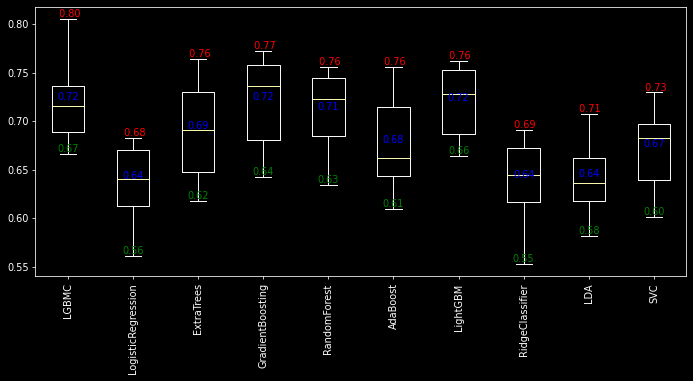

In [19]:
plt.boxplot(results,labels = names)
plt.xticks(rotation=90)
plt.title =('Models comparison')
# Annotate the mean, max, and min of each box with accuracy values
for i in range(len(names)):
    x = i + 1  # x-coordinate of the annotation
    data = results[i]  
    mean_value = np.mean(data)
    max_value = np.max(data)
    min_value = np.min(data)
    
    # Annotate mean value
    plt.text(x, mean_value, f'{mean_value:.2f}', ha='center', va='bottom', fontsize=10, color='blue')
    
    # Annotate max value
    plt.text(x, max_value, f' {max_value:.2f}', ha='center', va='bottom', fontsize=10, color='red')
    
    # Annotate min value
    plt.text(x, min_value, f'{min_value:.2f}', ha='center', va='bottom', fontsize=10, color='green')

plt.show()



<hr>

<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">6 -  Model Evaluation on Test Data</p>
<a name = 8 ></a>
<hr>



In [20]:
horse_test =pipeline.fit_transform(horse_test)


In [21]:

X= np.copy(horse_test)
X_test = np.delete(X,26, axis=1)
X_test= scaler.fit_transform(X_test)

Y_test = horse_test[:, 26] 


model = GradientBoostingClassifier(random_state=42)

model.fit(X_test, Y_test)
Score = model.score(X_test,Y_test)
Score


1.0



<hr>

<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;"> 7️⃣ - The Final Submission</p>
<a name = 9 ></a>
<hr>




In [22]:
#applay the prediction for all the data

final_data =pipeline.fit_transform(train_data)

In [23]:
X= np.copy(final_data)
X_final = np.delete(X,26, axis=1)
X_final= scaler.fit_transform(X_final)

Y_final = final_data[:, 26] 
model.fit(X_final, Y_final)
Score = model.score(X_final,Y_final)

Score

0.8689700130378096

In [24]:

param_grid = {
    'n_estimators': [50, 100, 150],  
    'max_depth': [2, 4, 6],      
    'learning_rate': [0.1, 0.05, 0.01], 
}


model = LGBMClassifier(random_state=42)


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_final, Y_final)  


best_params = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (Accuracy):", best_score)


Best Parameters: LGBMClassifier(max_depth=2, n_estimators=150, random_state=42)
Best Score (Accuracy): 0.7301249707266185


In [25]:
# The final test data 
horse_test_data.head(2)

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1235,no,adult,534053,38.6,40.0,20.0,normal,normal,normal_pink,less_3_sec,mild_pain,hypomotile,slight,none,none,7.0,normal,distend_small,42.0,7.5,clear,2.3,no,0,0,0,no
1,1236,yes,adult,528469,38.2,112.0,48.0,cool,reduced,bright_pink,more_3_sec,depressed,hypomotile,moderate,slight,none,3.5,decreased,distend_small,44.0,6.0,serosanguious,2.6,no,2208,0,0,yes


In [26]:
final_test = pipeline_for_test.fit_transform(horse_test_data)
final_test_scaler = scaler.fit_transform(final_test)
print(pd.DataFrame(final_test_scaler).head())

         0         1         2         3         4         5         6   \
0 -1.583156  0.231751  0.452957 -1.380223 -0.615318  0.491880  1.046795   
1  0.631650  0.231751 -0.056755  1.090013  0.991907 -0.720911 -0.744746   
2  0.631650  0.231751 -0.693895 -0.488193 -1.074525 -0.720911  1.046795   
3 -1.583156  0.231751 -1.458462  0.266601 -0.615318 -0.720911 -0.744746   
4  0.631650  0.231751  0.070673 -1.037135 -1.074525  0.000000  1.046795   

         7         8         9         10        11        12        13  \
0 -0.631467  0.720560 -0.168188 -0.777191  0.912264 -0.919074 -1.351450   
1  1.062423 -1.340342 -0.905987 -0.777191 -1.059800  0.650580 -1.351450   
2  1.627053  0.720560 -0.168188 -0.777191  0.912264  0.650580 -1.351450   
3 -1.196096  0.720560 -0.905987  0.641491  1.898295  0.650580  0.022044   
4  1.062423  0.720560 -0.168188  0.641491  0.912264  0.650580 -1.351450   

         14        15        16        17        18        19        20  \
0  1.323635  1.371920 -

In [27]:

final_prediction = best_params.predict(final_test_scaler)
final_prediction

array([2., 0., 2., 1., 2., 0., 2., 0., 2., 2., 0., 2., 2., 1., 0., 2., 2.,
       0., 0., 0., 0., 0., 0., 2., 0., 2., 0., 1., 2., 1., 2., 0., 0., 0.,
       2., 0., 2., 2., 0., 2., 0., 1., 0., 2., 2., 2., 0., 2., 2., 0., 1.,
       2., 0., 0., 2., 2., 0., 0., 1., 0., 2., 0., 0., 0., 0., 2., 1., 0.,
       2., 2., 0., 0., 2., 2., 1., 0., 2., 1., 0., 0., 0., 1., 2., 2., 2.,
       2., 2., 1., 1., 2., 1., 2., 0., 1., 1., 2., 0., 0., 0., 1., 0., 2.,
       2., 2., 1., 2., 0., 0., 2., 2., 0., 1., 2., 0., 2., 2., 2., 0., 0.,
       2., 0., 2., 2., 2., 0., 2., 0., 2., 1., 2., 2., 2., 2., 2., 0., 2.,
       2., 1., 2., 2., 0., 0., 0., 0., 0., 2., 2., 1., 0., 2., 0., 0., 2.,
       2., 0., 2., 0., 0., 2., 1., 2., 0., 2., 0., 0., 0., 2., 2., 1., 2.,
       2., 2., 0., 2., 2., 0., 0., 2., 2., 2., 0., 2., 2., 2., 0., 2., 2.,
       1., 2., 2., 2., 2., 2., 0., 2., 0., 0., 2., 0., 0., 0., 2., 2., 2.,
       0., 2., 2., 0., 1., 2., 0., 2., 2., 2., 0., 1., 2., 2., 1., 2., 0.,
       1., 1., 0., 0., 0.

In [28]:
sample_submission = pd.DataFrame(horse_test_data['id'])
sample_submission['outcome'] =final_prediction

reverse_mapping = {0: 'died', 1: 'euthanized', 2: 'lived'}
sample_submission['outcome'] = sample_submission['outcome'].map(reverse_mapping)
sample_submission.head()
sample_submission.to_csv("/kaggle/working/data_predictions.csv",index =False)



import os 
# Check if 'data_predictions.csv' is in the list of files
file_path = '/kaggle/working/data_predictions.csv'
if 'data_predictions.csv' in file_path:
    print("The file 'data_predictions.csv' exists in the current directory.")
else:
    print("The file 'data_predictions.csv' does not exist in the current directory.")

The file 'data_predictions.csv' exists in the current directory.


<h1 style="font-family: Trebuchet MS; font-size: 20px; color: #1b4332; text-align: center; ">
  <b>If you have any feedback or suggestions on how to enhance the model's performance, please feel free to share them in the comments below. Your insights are valuable and can help us refine our approach to achieve better results.</b>
</h1>


<h1 style="font-family: Trebuchet MS; font-size: 30px; color: #1b4332; text-align: center; "><b>Thank You</b></h1>